# **Galton's Height Data Linear Regression**

# **Import Library**

In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

# **Import Data**

In [36]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Francis%20Galton%20Regression%20Data.txt', delimiter= '\t')

In [37]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


### Problem 1 : Calculate the correlation matrix between Height, Father and Mother.

In [64]:
df.corr(numeric_only=True)

,Father,Mother,Gender,Height,Kids
Father,1.000000,0.073665,0.027148,0.275355,-0.160023
Mother,0.073665,1.000000,0.035617,0.201655,-0.020030
Gender,0.027148,0.035617,1.000000,-0.714258,0.063257
Height,0.275355,0.201655,-0.714258,1.000000,-0.126910
Kids,-0.160023,-0.020030,0.063257,-0.126910,1.000000


### Problem 2 :  Create a matrix of scatterplots of the columns Height, Father and Mother. This is a graphical representation of the correlation matrix calculated above.

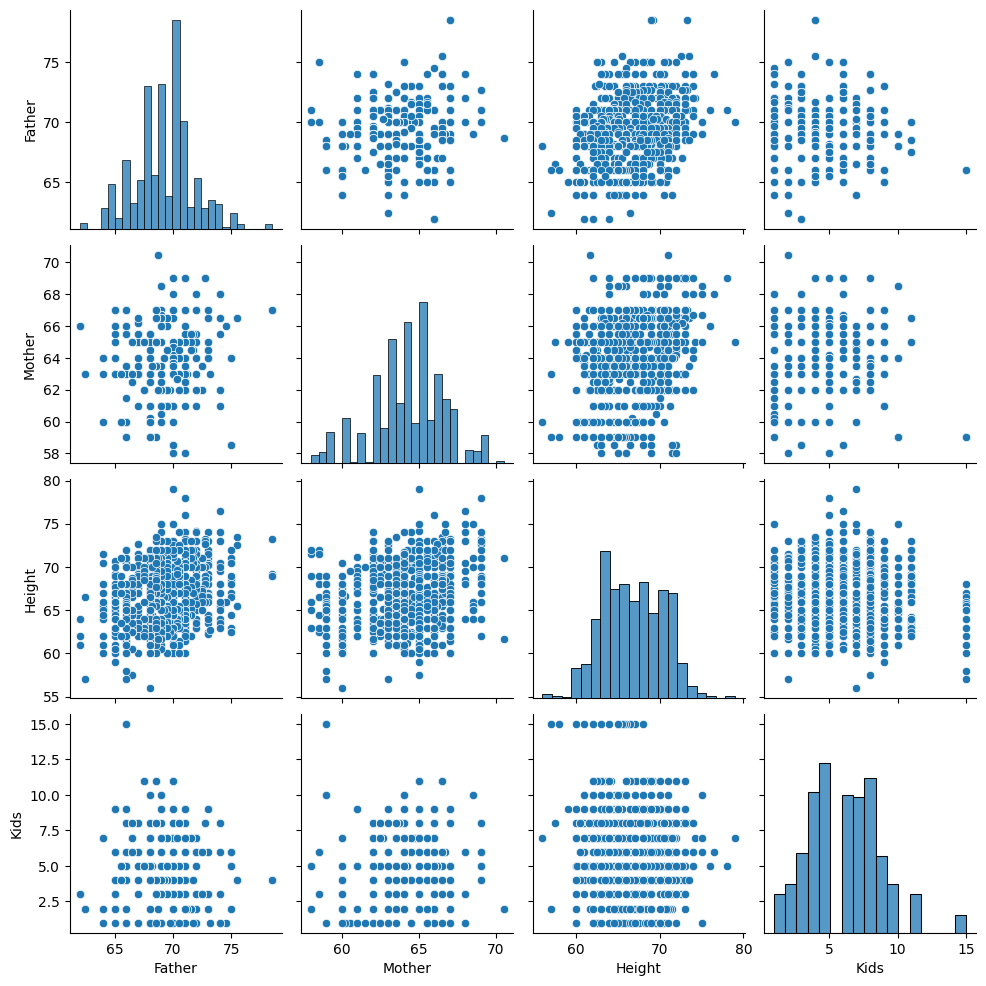

In [40]:
sns.pairplot(df)

### Problem 3 : Fit Simple Regression Height (y) and Father Height (X)

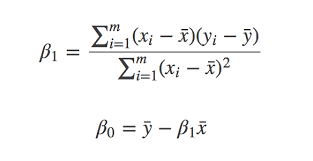

In [41]:
y = df['Height']

In [42]:
X = df['Father']

In [43]:
slope = ((df['Father']-df['Father'].mean())*(df['Height']-df['Height'].mean())).sum()/((df['Father']-df['Father'].mean())**2).sum()

In [44]:
slope

0.3993812658985653

In [45]:
intercept = y.mean()-slope*X.mean()

In [46]:
intercept

39.110386837075396

In [47]:
X = df[['Father']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

39.11038683707541
[0.39938127]


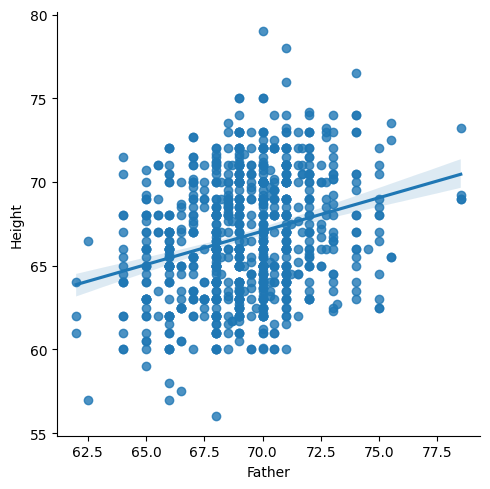

In [48]:
sns.lmplot(x = 'Father', y = 'Height', data = df)

<Axes: xlabel='Father', ylabel='Height'>

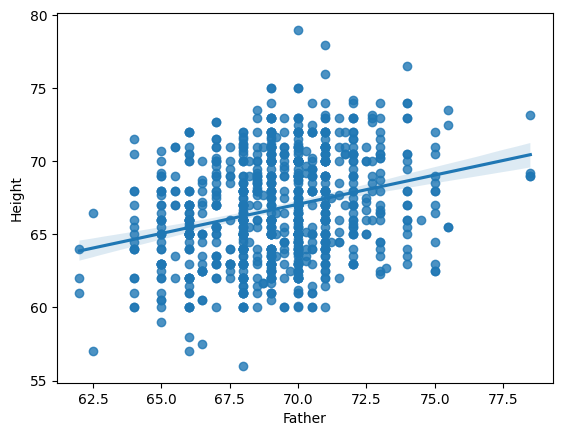

In [49]:
sns.regplot(x = 'Father', y = 'Height', data = df)

### Problem 4 : Fit a multiple regression model predicting children’s height (Height) from father’s height (Father), mother’s height (Mother), and gender (Gender). In other words, the model should contain the following terms:

Height^Children=β0+β1fgender+β2HeightFather+β3HeightMother,
where H^Children is the predicted height (in inches) of the adult children, HeightFather and HeightMother are the height (in inches) of the father and mother, respectively. fgender is a binary variable: fgender=0 for males and fgender=1 for females.

In [50]:
df['Gender'] = df['Gender'].replace({'M':0,'F':1})
X = df[['Gender', 'Father', 'Mother']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

20.570711329351845
[-5.22595131  0.40597803  0.32149514]


**Height = 20.57 - 5.22 * Gender + 0.40 * Father + 0.32 * Mother + error**

### Problem 5 : Plot the residuals versus the fitted values for the multiple regression model above.

In [51]:
y_pred = lr.predict(X)

In [52]:
residual = y-y_pred

In [53]:
residual.shape, y.shape

((898,), (898,))

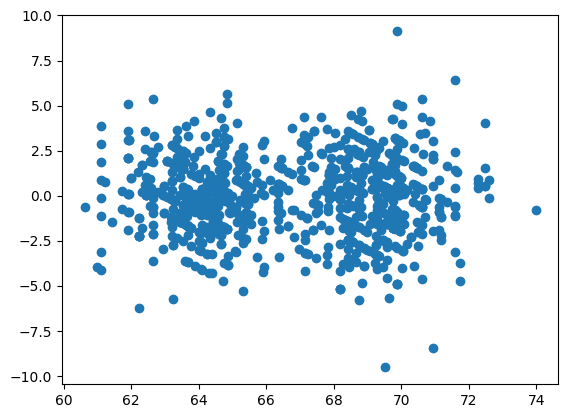

In [54]:
plt.scatter( x = y_pred, y = residual);

### Problem 6 : Calculate the means of Father’s and Mother’s heights in the data set. Then show that Father’s mean height is about 8% higher than Mother’s mean height.

In [55]:
df.describe()

,Father,Mother,Gender,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,0.482183,66.760690,6.135857
std,2.470256,2.307025,0.499961,3.582918,2.685156
min,62.000000,58.000000,0.000000,56.000000,1.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000
50%,69.000000,64.000000,0.000000,66.500000,6.000000
75%,71.000000,65.500000,1.000000,69.700000,8.000000
max,78.500000,70.500000,1.000000,79.000000,15.000000


### Problem 7 : Calculate the mean heights of the adult male and female children in the data set. Then show that male children’s mean height is also about 8% higher than female children’s mean height.

In [63]:
df.groupby(['Gender']).mean(numeric_only=True)

,Father,Mother,Height,Kids
Gender,,,,
0,69.168172,64.005161,69.228817,5.972043
1,69.302309,64.169515,64.110162,6.311778


In [57]:
69.2/64.11-1

0.07939479020433637

### Problem 8 : Calculate the medians of Father’s and Mother’s heights in the data set. Then show that Father’s median height is about 8% higher than Mother’s median height.

In [58]:
df.describe()

,Father,Mother,Gender,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,0.482183,66.760690,6.135857
std,2.470256,2.307025,0.499961,3.582918,2.685156
min,62.000000,58.000000,0.000000,56.000000,1.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000
50%,69.000000,64.000000,0.000000,66.500000,6.000000
75%,71.000000,65.500000,1.000000,69.700000,8.000000
max,78.500000,70.500000,1.000000,79.000000,15.000000


In [59]:
69/64-1

0.078125

### Problem 9 : Compute the correlation in heights between mothers and daughters, mothers and sons, fathers and daughters, and fathers and sons.

In [62]:
df.groupby(['Gender']).corr(numeric_only=True)

Father    Mother    Height      Kids
Gender                                               
0      Father  1.000000  0.106335  0.391317 -0.091266
       Mother  0.106335  1.000000  0.334131 -0.004485
       Height  0.391317  0.334131  1.000000 -0.112378
       Kids   -0.091266 -0.004485 -0.112378  1.000000
1      Father  1.000000  0.041074  0.458761 -0.226864
       Mother  0.041074  1.000000  0.313698 -0.041436
       Height  0.458761  0.313698  1.000000 -0.122937
       Kids   -0.226864 -0.041436 -0.122937  1.000000

### Problem 10 :

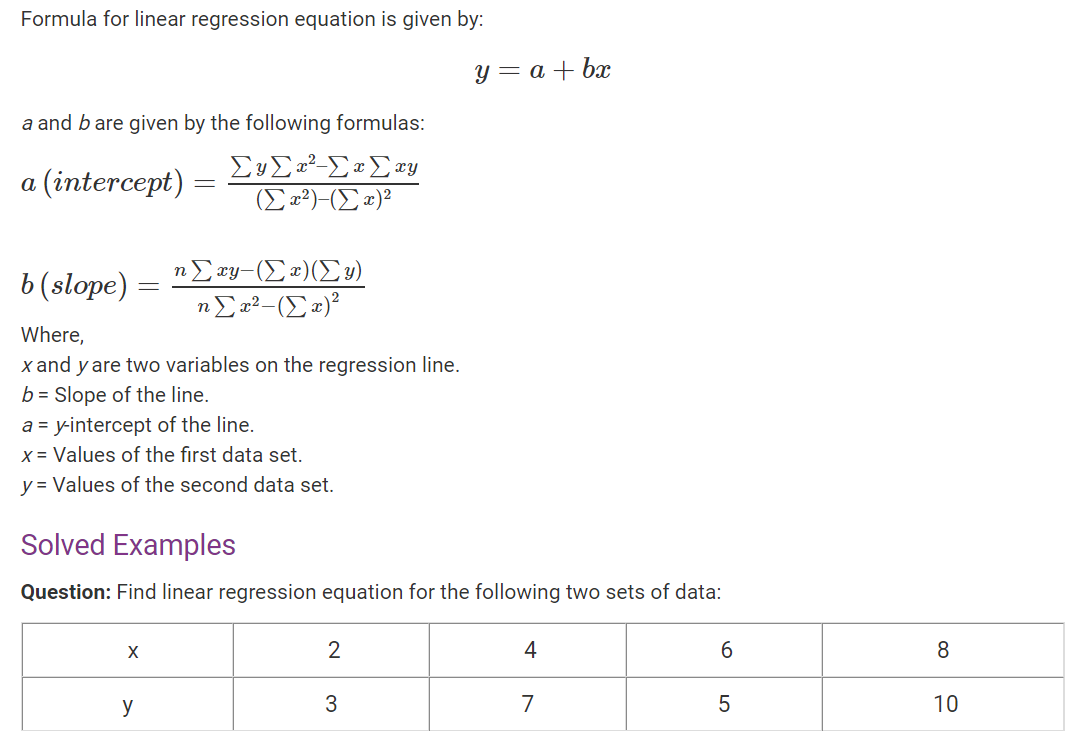

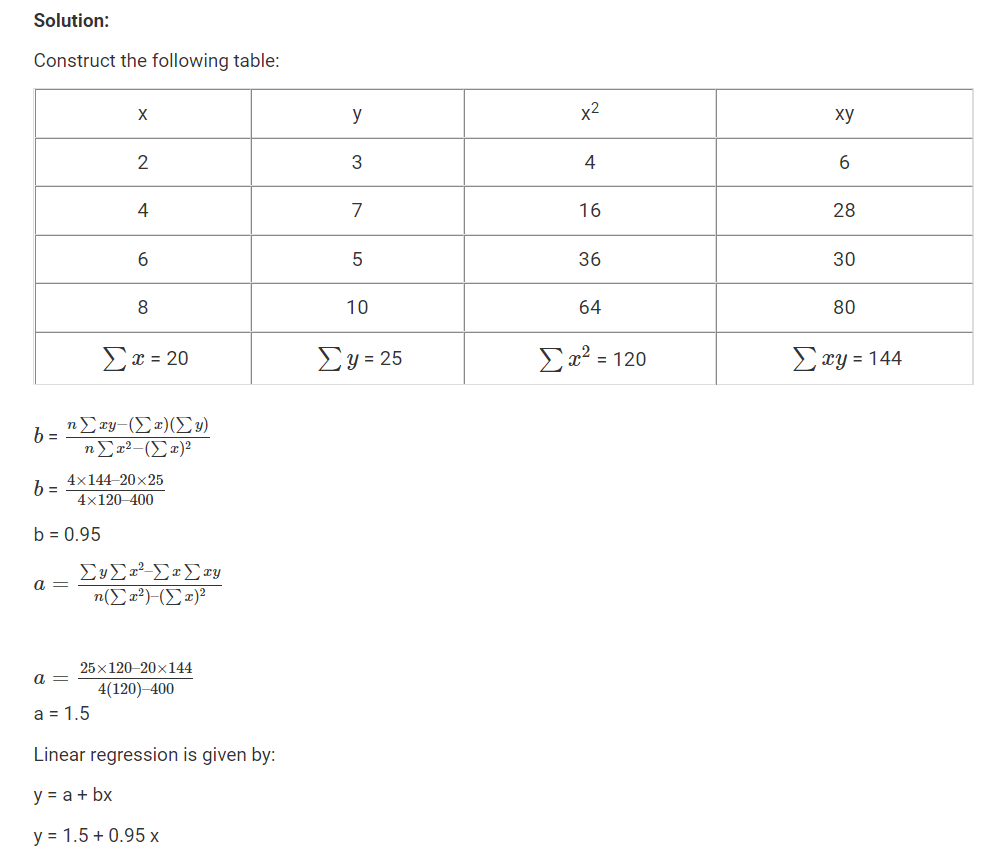

In [61]:
X = np.array([2,4,6,8]).reshape(-1,1)
y = np.array([3,7,5,10])
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

1.5
[0.95]


-----------